<a href="https://colab.research.google.com/github/ricardoyuuri/FIAP_1TDS/blob/main/CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [142]:
dataset = pd.read_csv("/content/Disease_symptom_and_patient_profile_dataset.csv")

In [131]:
df = pd.DataFrame(dataset)

In [180]:
nome = "Disease_symptom_and_patient_profile"
origem = "O DataSet escolhido fala sobre algumas doenças e seus sintomas"
tamanho = "Tamanho do conjunto de dados"
quantidade_registros = "349 rows"
linhas = dataset.values
colunas = dataset.columns.values
dados_inexistentes = dataset.isnull().sum()

In [181]:
print("Nome: " + nome)
print("Origem: " + origem)
print("Tamanho: " + tamanho)
print("Quantidade de Registros: " + quantidade_registros)
print(f"Linhas: {linhas}  {colunas}")
print(f"Colunas:  {colunas}")
print("Não há dados inexistentes")
print(dados_inexistentes)


Nome: Disease_symptom_and_patient_profile
Origem: O DataSet escolhido fala sobre algumas doenças e seus sintomas
Tamanho: Tamanho do conjunto de dados
Quantidade de Registros: 349 rows
Linhas: [['Influenza' 'Yes' 'No' ... 'Low' 'Normal' 'Positive']
 ['Common Cold' 'No' 'Yes' ... 'Normal' 'Normal' 'Negative']
 ['Eczema' 'No' 'Yes' ... 'Normal' 'Normal' 'Negative']
 ...
 ['Stroke' 'Yes' 'No' ... 'High' 'High' 'Positive']
 ['Stroke' 'Yes' 'No' ... 'High' 'High' 'Positive']
 ['Stroke' 'Yes' 'No' ... 'High' 'High' 'Positive']]  ['Disease' 'Fever' 'Cough' 'Fatigue' 'Difficulty Breathing' 'Age' 'Gender'
 'Blood Pressure' 'Cholesterol Level' 'Outcome Variable']
Colunas:  ['Disease' 'Fever' 'Cough' 'Fatigue' 'Difficulty Breathing' 'Age' 'Gender'
 'Blood Pressure' 'Cholesterol Level' 'Outcome Variable']
Não há dados inexistentes
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender       

In [145]:
dataset

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [146]:
dataset_Null = dataset.dropna()

In [147]:
dataset_Null

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [148]:
quantidade_registros = len(dataset)

In [149]:
quantidade_registros

349

In [150]:
linhas = dataset.values

In [151]:
linhas

array([['Influenza', 'Yes', 'No', ..., 'Low', 'Normal', 'Positive'],
       ['Common Cold', 'No', 'Yes', ..., 'Normal', 'Normal', 'Negative'],
       ['Eczema', 'No', 'Yes', ..., 'Normal', 'Normal', 'Negative'],
       ...,
       ['Stroke', 'Yes', 'No', ..., 'High', 'High', 'Positive'],
       ['Stroke', 'Yes', 'No', ..., 'High', 'High', 'Positive'],
       ['Stroke', 'Yes', 'No', ..., 'High', 'High', 'Positive']],
      dtype=object)

In [152]:
colunas = dataset.columns.values

In [153]:
colunas

array(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Outcome Variable'], dtype=object)

In [163]:
colunas_para_excluir = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Outcome Variable']


In [164]:
y = df['Blood Pressure']
x = df.drop(columns=colunas_para_excluir)


In [165]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [166]:
lda = LinearDiscriminantAnalysis()

In [167]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [168]:
y_predicoes = lda.predict(x_test)

In [175]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Normal','High'])

<Figure size 1500x500 with 0 Axes>

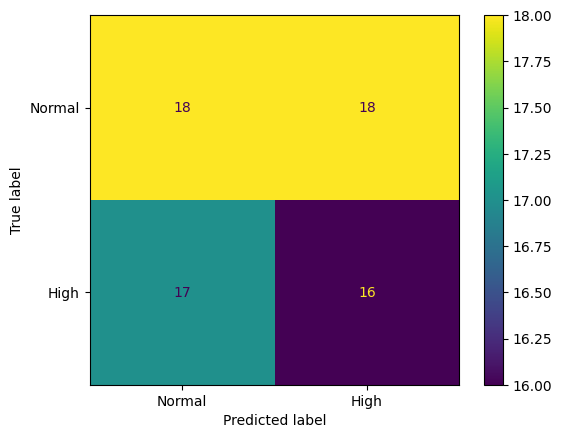

In [176]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['Normal','High'])

disp.plot(values_format='d')


In [185]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_predic = rf.predict(x_test)

print(classification_report(y_test, y_predic))


              precision    recall  f1-score   support

        High       0.47      0.67      0.55        33
         Low       0.00      0.00      0.00         1
      Normal       0.52      0.33      0.41        36

    accuracy                           0.49        70
   macro avg       0.33      0.33      0.32        70
weighted avg       0.49      0.49      0.47        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.46      0.48      0.47        33
         Low       0.00      0.00      0.00         1
      Normal       0.51      0.50      0.51        36

    accuracy                           0.49        70
   macro avg       0.32      0.33      0.33        70
weighted avg       0.48      0.49      0.48        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
"""Na coluna de Blood Pressure, a linha de código, na qual mostra a Regressão Logística,
tem uma precisão de 0.46, o que significa que 46% das
 estatistícas positivas para o High estavam corretas.No Low não obtivemos dados além de 0. Já na precisão de Normal, obtivemos os dados de 0.51 ou 51% na precisão.
A revocação de High é de 0.48, o que significa que o código capturou
48% dos exemplos. já no Low, não obtivemos dados neste quesito. Na pressão Normal a revocação é de 0.50 ou 50%.
"""

'Na coluna de Blood Pressure, a linha de código, na qual mostra a Regressão Logística,\ntem uma precisão de 0.46, o que significa que 46% das\n estatistícas positivas para o High estavam corretas.No Low não obtivemos dados além de 0. Já na precisão de Normal, obtivemos os dados de 0.51 ou 51% na precisão.\nA revocação de High é de 0.48, o que significa que o código capturou\n48% dos exemplos. já no Low, não obtivemos dados neste quesito. Na pressão Normal a revocação é de 0.50 ou 50%.\n'

In [187]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

y_p = svm.predict(x_test)

print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

        High       0.49      0.88      0.63        33
         Low       0.00      0.00      0.00         1
      Normal       0.64      0.19      0.30        36

    accuracy                           0.51        70
   macro avg       0.38      0.36      0.31        70
weighted avg       0.56      0.51      0.45        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
